# **Data Understanding & Exploratory Data Analysis**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
file_path = f"D:\\Kishanth\\Guvi Project\\Power Pulse-Household Energy Usage Forecast\\individual+household+electric+power+consumption\\household_power_consumption.txt"

### Observation - 1
From the Dataset Information, we know that the dataset contains missing values in the measurements (nearly 1,25% of the rows). So, While loading the dataset converting the "?" into null values on the respective columns.

In [34]:
data = pd.read_csv(file_path,sep=";",low_memory=False, na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)

In [35]:
data.head(10)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


### Observation - 2
As we treated the unknown character "?" as null value. The columns datatype are treated based on the respective values.

In [37]:
data.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


### **Data Visualization Analysis**

### Observation - 3

Checks for the Outlier using Box Plot and Histogram visualization 

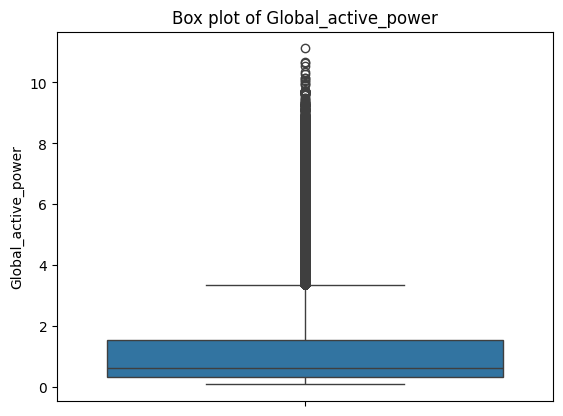

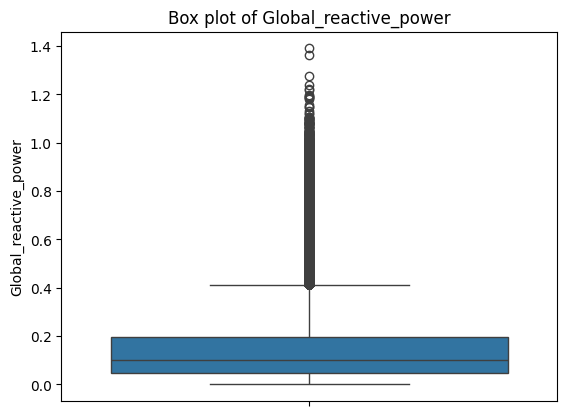

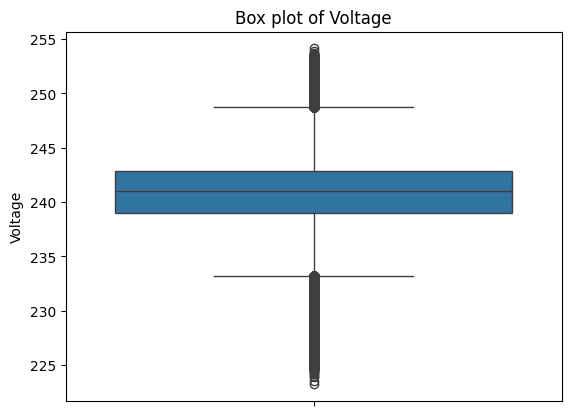

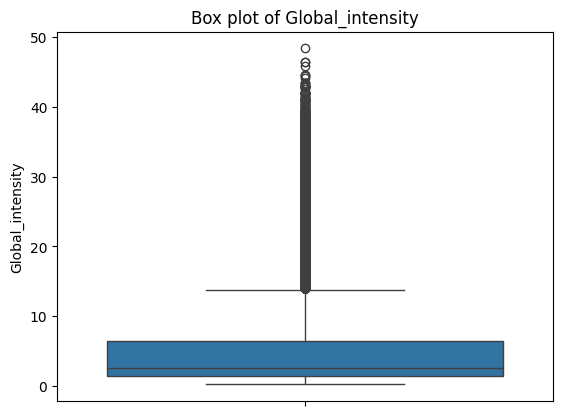

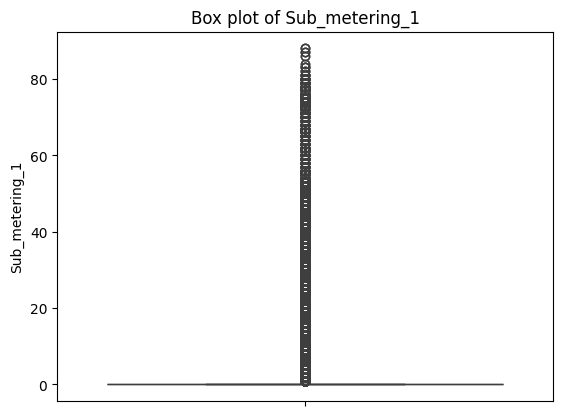

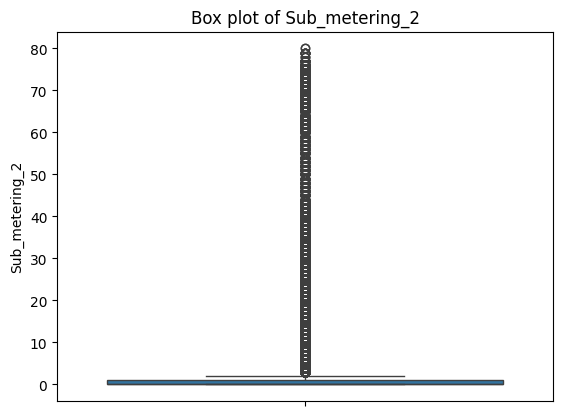

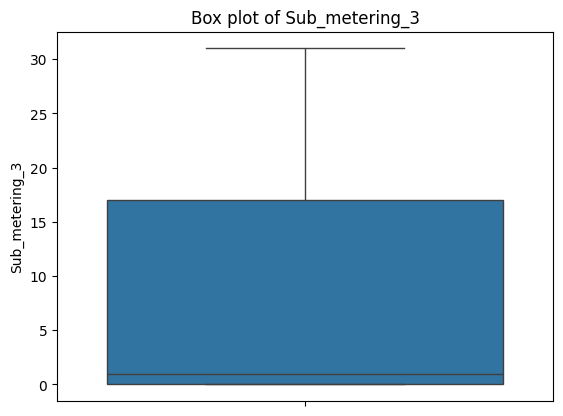

In [38]:
# Box Plot Visualization

col_list = data.columns
for i in col_list[1:]:
  sns.boxplot(y=data[i])
  plt.title(f"Box plot of {i}")
  plt.show()

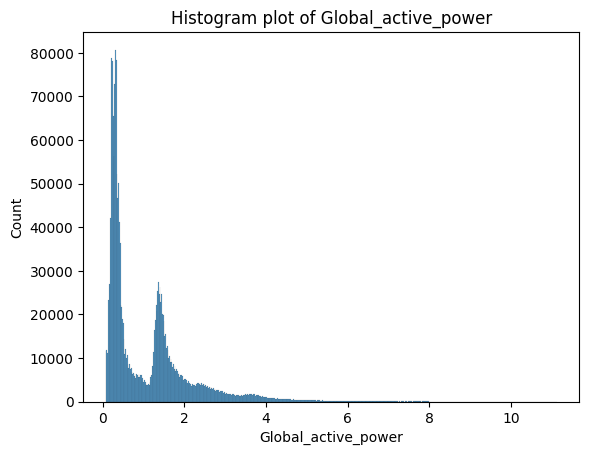

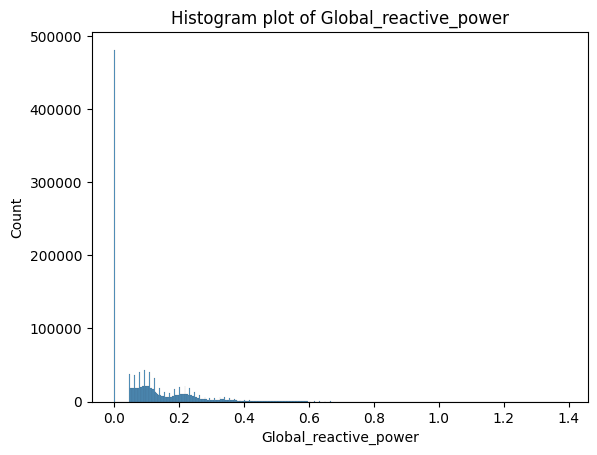

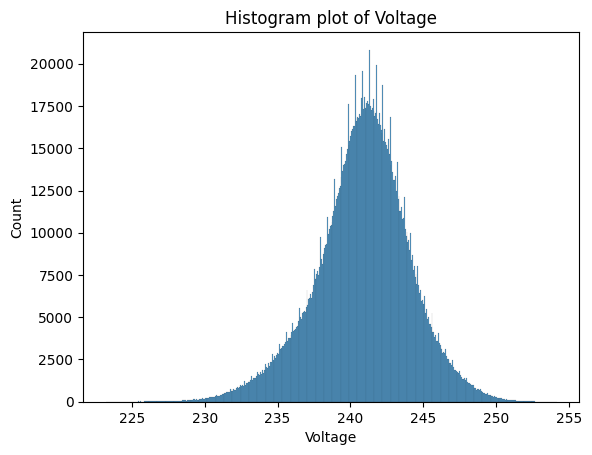

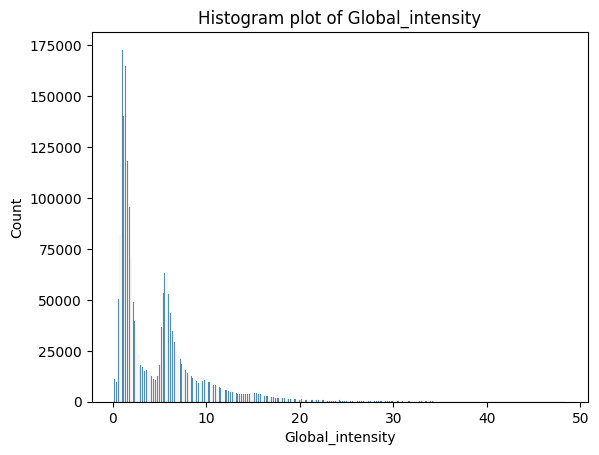

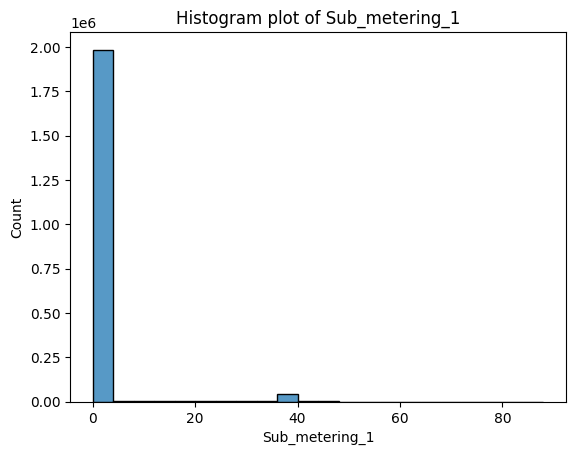

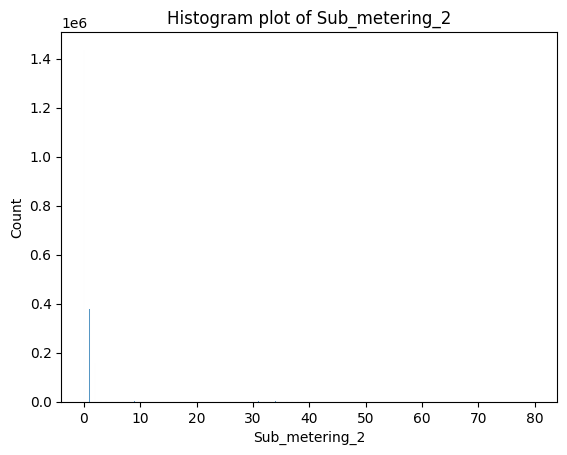

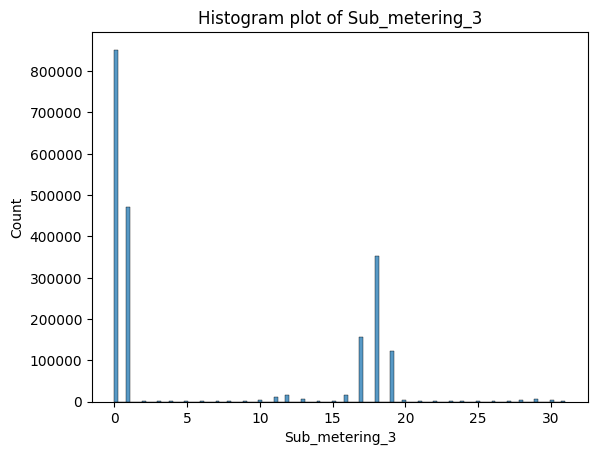

In [39]:
# Histogram Visualization

for i in col_list[1:]:
  sns.histplot(data=data,x=data[i])
  plt.title(f"Histogram plot of {i}")
  plt.show()

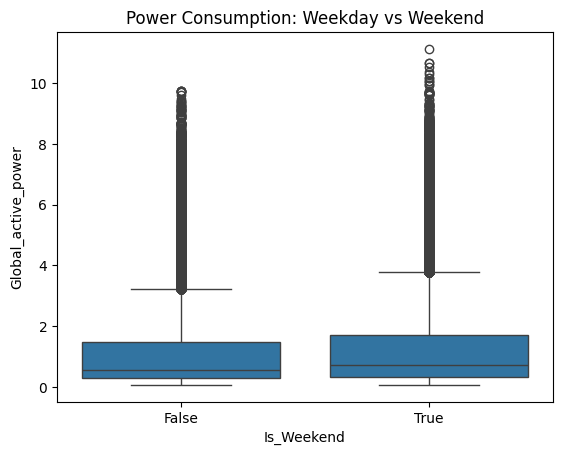

In [40]:
data["Day_of_Week"] = data["datetime"].dt.dayofweek
data["Is_Weekend"] = data["Day_of_Week"].isin([5, 6])

weekend_data = data[data["Is_Weekend"]]
weekday_data = data[~data["Is_Weekend"]]

sns.boxplot(x="Is_Weekend", y="Global_active_power", data=data)
plt.title("Power Consumption: Weekday vs Weekend")
plt.show()

data.drop(["Day_of_Week","Is_Weekend"],axis=1,inplace=True)

### Observation - 4

The outliers were cross-verified with the dates and identified as genuine, as the high values occur during weekends, holidays, and special occasions.

In [41]:
data.isnull().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Observation - 5

All the columns contain null values of 25,979 rows. 

### **Trend Analysis**

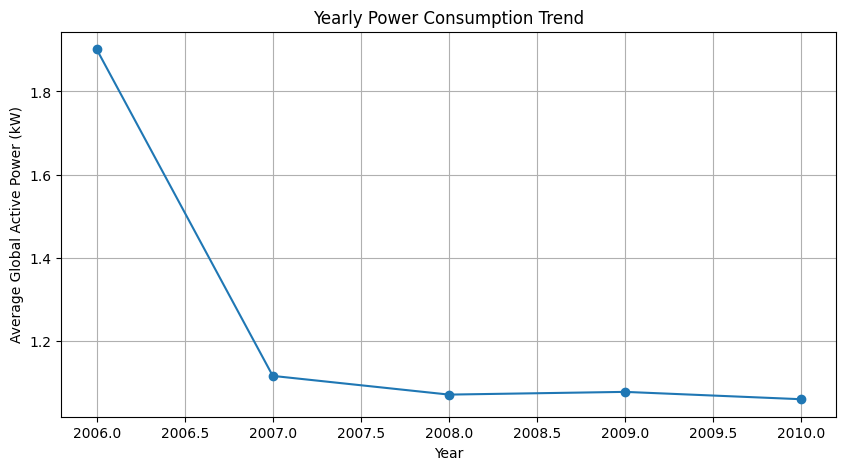

In [42]:
# Group by year and calculate the average power consumption
yearly_trend = data.groupby(data["datetime"].dt.year)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10,5))
yearly_trend.plot(kind="line", marker="o", title="Yearly Power Consumption Trend")
plt.xlabel("Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

### Observation - 6

The average consumption in 2006 is notably higher compared to subsequent years, indicating possible anomalies or increased household activity during that year.

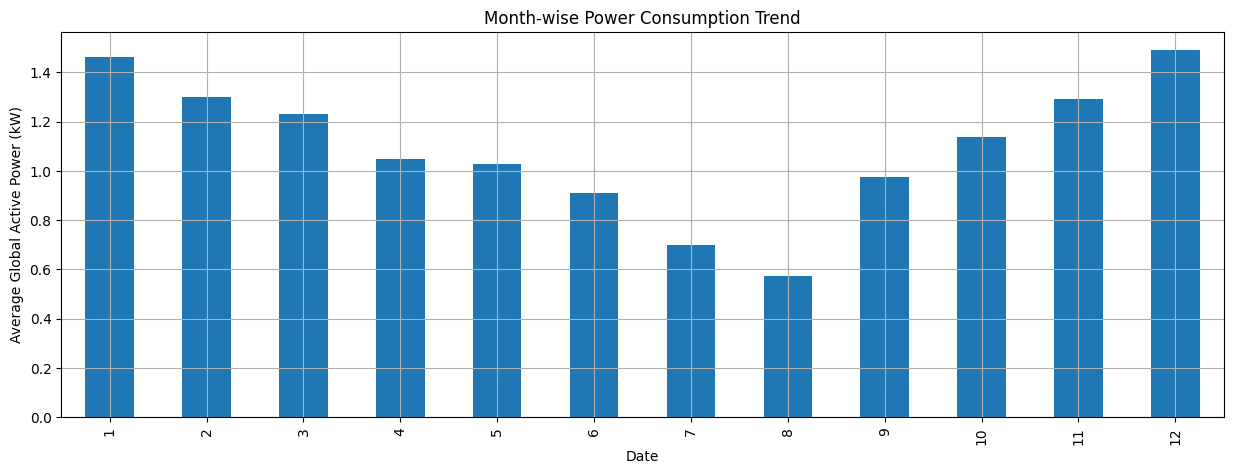

In [43]:
# Group by month and calculate the average power consumption
monthly_trend = data.groupby(data["datetime"].dt.month)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
monthly_trend.plot(kind="bar", title="Month-wise Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

### Observation - 7

The highest average power consumption occurs in January and December, likely due to increased heating requirements during the winter season. The peak in December may also result from holiday celebrations

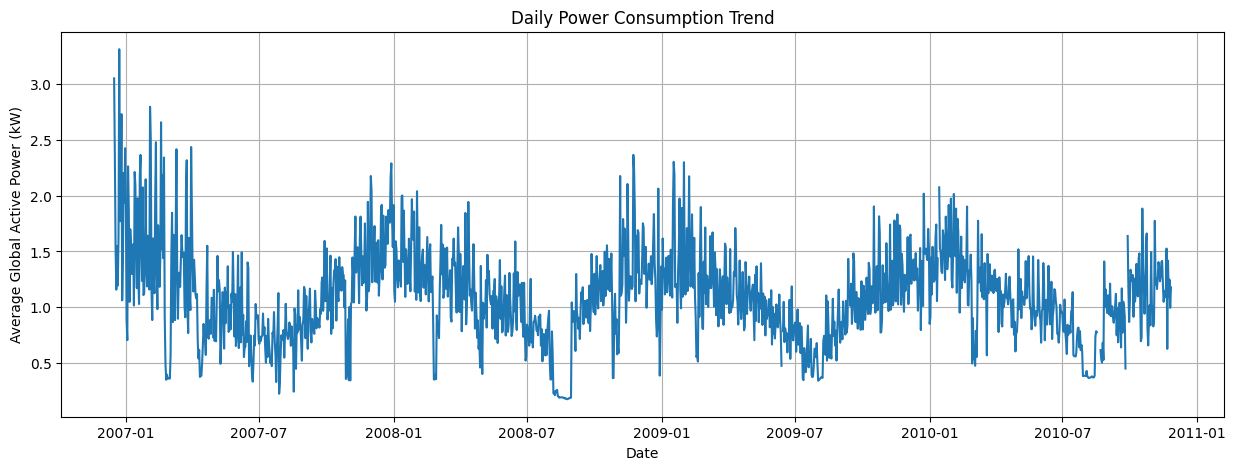

In [44]:
# Group by day and calculate the average power consumption
daily_trend = data.groupby(data["datetime"].dt.date)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

### Observation - 8

The general decline in daily power usage might indicate the adoption of energy-efficient appliances or behavioral changes. Winter peaks likely align with increased heating demands, while summer dips could reflect lower energy requirements.

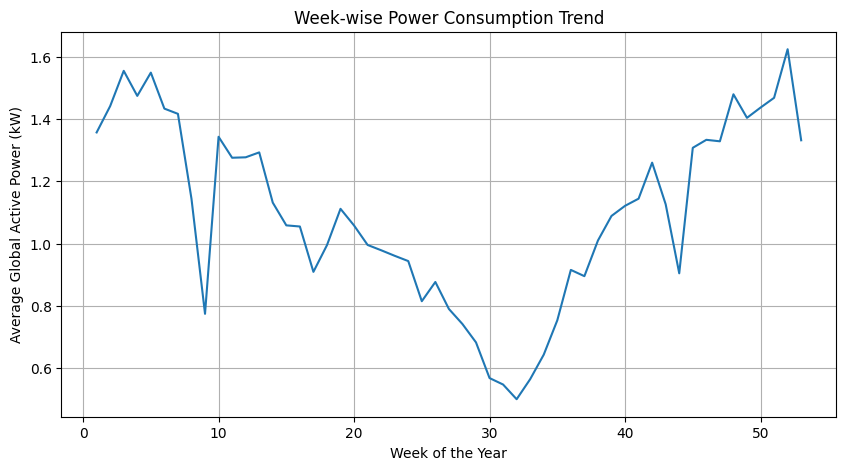

In [45]:
# Group by week and calculate the average power consumption
weekly_trend = data.groupby(data["datetime"].dt.isocalendar().week)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind="line", title="Week-wise Power Consumption Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

### Observation - 9

Power consumption is higher during certain weeks, notably at the beginning (weeks 1–10) and end of the year (weeks 40–52). There is a significant dip in power consumption around weeks 20–30, which could correspond to summer months when power demand for heating is lower.

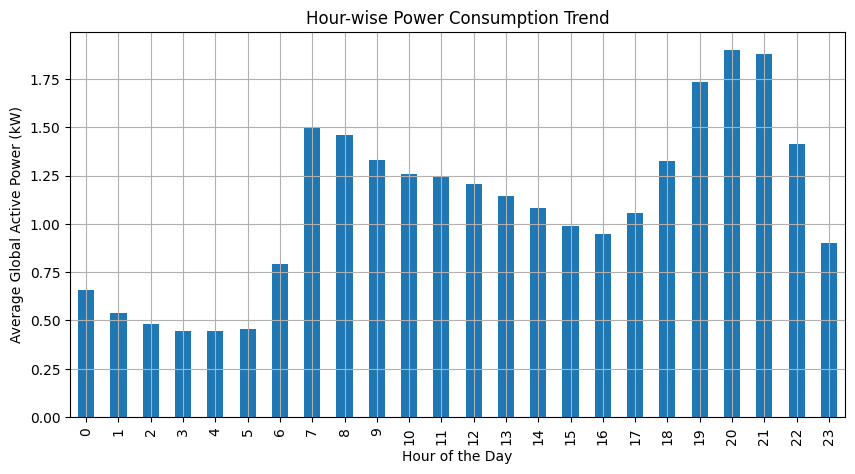

In [46]:
# Group by hour and calculate the average power consumption
hourly_trend = data.groupby(data["datetime"].dt.hour)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar", title="Hour-wise Power Consumption Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

### Observation - 10

The highest power consumption occurs between 7 AM and 9 AM & between 7 AM and 9 AM, which aligns with morning and evening routines. The data shows clear daily patterns in power usage, with peaks corresponding to typical human activity cycles (morning and evening).

### **Data Preprocessing**

In [47]:
# Handling Missing values

for _ in data.columns:
    data[_].fillna(data[_].median(), inplace=True)

In [48]:
# Adding few features from the existing datetime features

data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour

Creating additional Features:
1) Daily Average
2) Peak Hour
3) Rolling Average
4) Hourly Consumption

In [49]:
# Daily Average

daily_average = data.groupby(data["datetime"].dt.date)["Global_active_power"].mean()
data["daily_average"] = data["datetime"].dt.date.map(daily_average)

In [50]:
# Peak Hour

hourly_avg = data.groupby([data["datetime"].dt.date,data["datetime"].dt.hour])["Global_active_power"].sum()
peak_hour_per_day = hourly_avg.groupby(level=0).max()
data["peak_hour"] = data["datetime"].dt.date.map(peak_hour_per_day)

In [51]:
# Rolling Average

rolling_average = (data.groupby(data["datetime"].dt.date)["Global_active_power"].apply(lambda x: x.rolling(window=2, min_periods=1).mean()))
data["rolling_average"] = rolling_average.reset_index(drop=True)

In [52]:
# Hourly Consumption

hourly_consumption = data.groupby([data["datetime"].dt.date, data["datetime"].dt.hour])["Global_active_power"].sum()
hourly_consumption.index.set_names(["date", "hour"], inplace=True)
data_hrs = hourly_consumption.reset_index()
data_hrs.columns = ["date", "hour", "hourly_consumption"]
data["date"] = data["datetime"].dt.date
data = pd.merge(data, data_hrs, on=["date", "hour"], how="left")
data.drop("date",axis=1,inplace=True)

### Feature selection using Correlation matrix and Heatmap

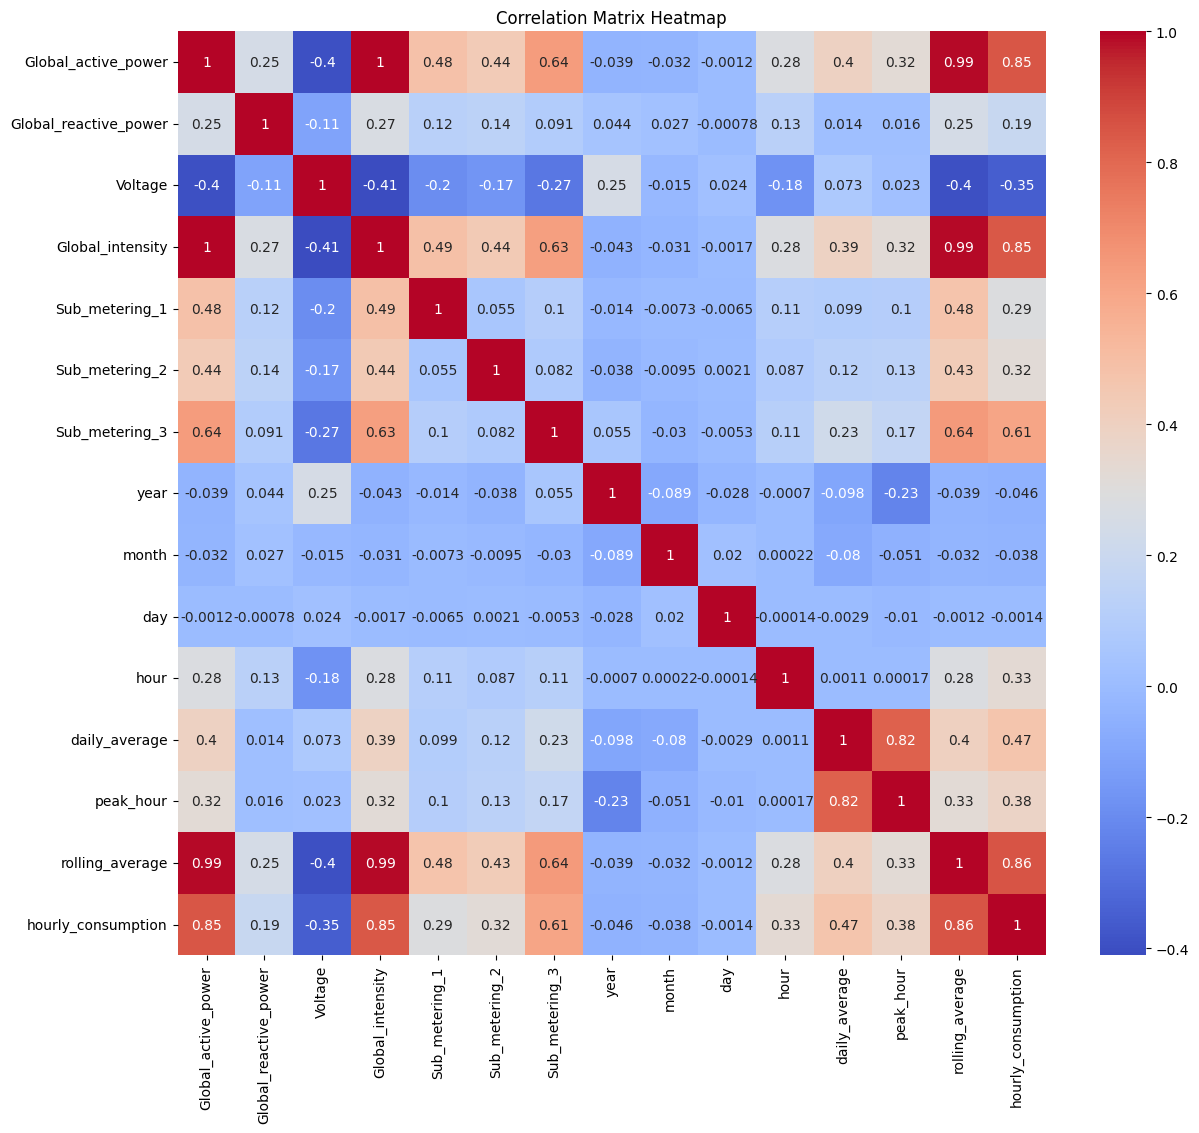

In [53]:
corr_matrix = data[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2",
       "Sub_metering_3", "year", "month", "day", "hour", "daily_average", "peak_hour", "rolling_average", "hourly_consumption"]].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Observation - 11

**Key Predictors:** Features like Global_reactive_power, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, daily_average, and hourly_consumption are likely strong predictors of Global_active_power.

**Voltage Dependency:** Voltage has a weaker relationship with power consumption, implying it might not be a crucial feature for predictive models.

**Feature Redundancy:** Global_active_power are highly correlated with Rolling_average and Global_intensity. Correlation between Global_intensity & Rolling_average is perfect positive linear relationship so including both in a predictive model may not add value and lead to multicollinearity, making coefficient estimates unstable.

In [54]:
X = data.drop(["datetime","Global_active_power","peak_hour","rolling_average"],axis=1)
y = data["Global_active_power"]

In [55]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# y_train_scaled = scaler.fit_transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [57]:
# Define models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

In [58]:
# Hyperparameter grids

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(64,), (128, 64)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001]
    }
}

In [59]:
# Training and hyperparameter tuning

best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}")
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='neg_mean_squared_error')
        if model_name == 'Neural Network':
            grid_search.fit(X_train_scaled, y_train)
        else:
            grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model
    print(f"{model_name} training completed.")

Training Linear Regression
Linear Regression training completed.
Training Random Forest
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Random Forest training completed.
Training Gradient Boosting
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting training completed.
Training Neural Network
Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64)}
Neural Network training completed.


In [60]:
# Model evaluation

def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

In [61]:
print("\nModel Evaluation:")
results = []
for model_name, model in best_models.items():
    scaled = model_name in ['Neural Network', 'Gradient Boosting']
    mse, mae, r2 = evaluate_model(model, X_test, y_test, scaled)
    results.append((model_name, mse, mae, r2))
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Select the best model
best_model = sorted(results, key=lambda x: x[1])[0]  # Based on MSE
print(f"\nBest Model: {best_model[0]} with MSE: {best_model[1]:.4f}")


Model Evaluation:
Linear Regression - MSE: 0.0016, MAE: 0.0254, R2: 0.9986
Random Forest - MSE: 0.0006, MAE: 0.0108, R2: 0.9995
Gradient Boosting - MSE: 2.0072, MAE: 1.0162, R2: -0.8114
Neural Network - MSE: 0.0008, MAE: 0.0174, R2: 0.9993

Best Model: Random Forest with MSE: 0.0006
